In [1]:
import kagglehub

In [2]:
path = kagglehub.dataset_download("kshitij192/cars-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 36.3M/36.3M [00:00<00:00, 62.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kshitij192/cars-image-dataset/versions/3


In [3]:
import requests
r = requests.get("https://www.kaggle.com/api/v1/datasets/download/kshitij192/cars-image-dataset?dataset_version_number=3", stream=True)
with open("archive.zip", 'wb') as fd:
    for chunk in r.iter_content(chunk_size=128):
        fd.write(chunk)

In [4]:
import zipfile
with zipfile.ZipFile("/content/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [5]:
# prompt: Import images as numpy array from path /content/Cars Dataset/test using ImageDataGenerator

import kagglehub
import requests
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming the provided code has already been executed and the dataset is extracted to /content/

# Check if the directory exists
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    # print(image.shape)
    return image

def getImageGen(path, batch_len=32):
  if not os.path.exists(path):
      print(f"Error: The directory {path} does not exist. Please ensure the dataset is correctly downloaded and extracted.")
  else:
      # Define the image data generator with desired parameters (e.g., rescaling)
      datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=to_grayscale_then_rgb)

      # Create the image generator from the specified directory
      image_generator = datagen.flow_from_directory(
          directory=path,
          target_size=(256, 256), # Specify target size for images
          batch_size=batch_len,
          class_mode='categorical', # or 'binary' depending on your task
          interpolation='nearest',
      )


      # Access the images as numpy arrays through the image_generator
      for images, labels in image_generator:
          print(images.shape)  # Output: (batch_size, image_height, image_width, num_channels)
          print(labels.shape)  # Output: (batch_size, num_classes)
          break # Process only one batch to avoid printing the whole dataset
      return image_generator

In [6]:
test_img_gen = getImageGen("/content/Cars Dataset/test", 813)
for x, y in test_img_gen:
  X_test = x
  y_test = y
  break
train_img_gen = getImageGen("/content/Cars Dataset/train", 3352)
for x, y in train_img_gen:
  X_train = x
  y_train = y
  break

Found 813 images belonging to 7 classes.
(813, 256, 256, 3)
(813, 7)
Found 3352 images belonging to 7 classes.
(3352, 256, 256, 3)
(3352, 7)


In [7]:
import numpy as np
X_test = np.delete(X_test, 1, 3)
X_test = np.delete(X_test, 1, 3)
print(X_test.shape)
X_train = np.delete(X_train, 1, 3)
X_train = np.delete(X_train, 1, 3)
print(X_train.shape)

(813, 256, 256, 1)
(3352, 256, 256, 1)


In [8]:
import matplotlib.pyplot as plt

# Assuming X_test is a NumPy array of images and the first image is at index 0
def display_image(X, y,number):
  for i in range(number):
    image = X[i]
    plt.imshow(image)
    plt.axis('off')  # Hide the axis ticks and labels
    plt.show()
    print(y[i])

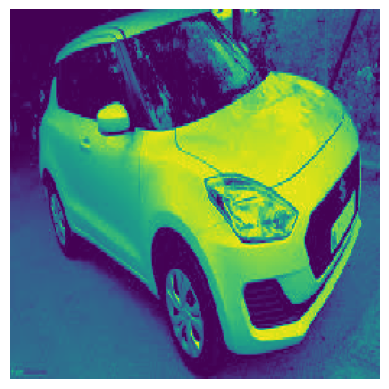

[0. 0. 0. 0. 1. 0. 0.]


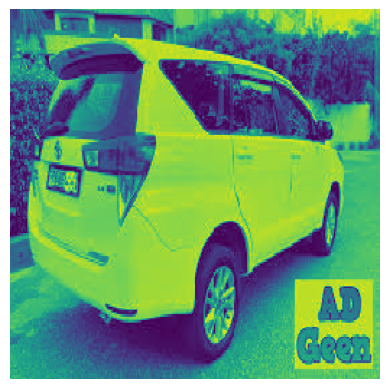

[0. 0. 0. 0. 0. 0. 1.]


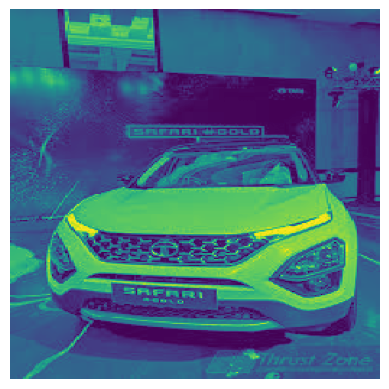

[0. 0. 0. 0. 0. 1. 0.]


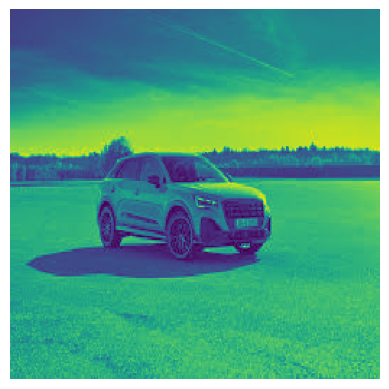

[1. 0. 0. 0. 0. 0. 0.]


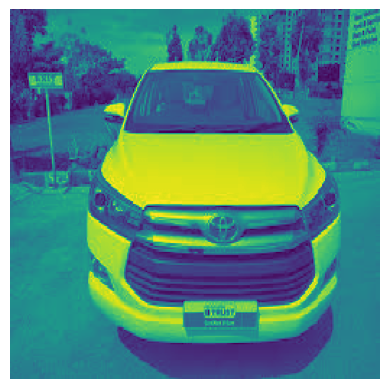

[0. 0. 0. 0. 0. 0. 1.]


In [9]:
display_image(X_test, y_test, 5)

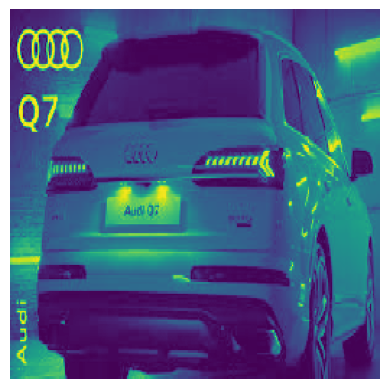

[1. 0. 0. 0. 0. 0. 0.]


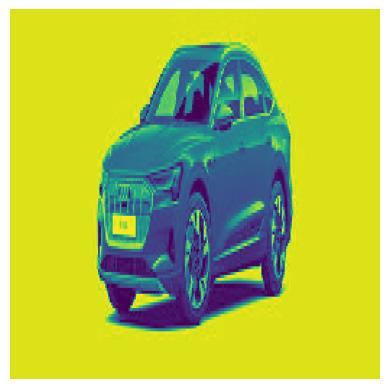

[1. 0. 0. 0. 0. 0. 0.]


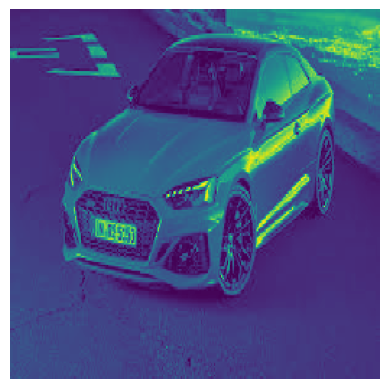

[1. 0. 0. 0. 0. 0. 0.]


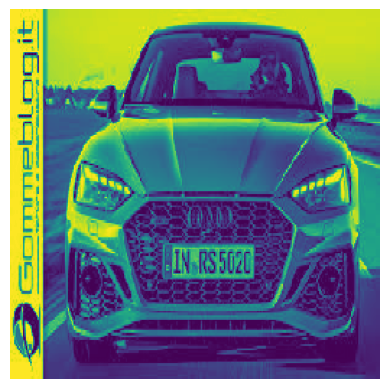

[1. 0. 0. 0. 0. 0. 0.]


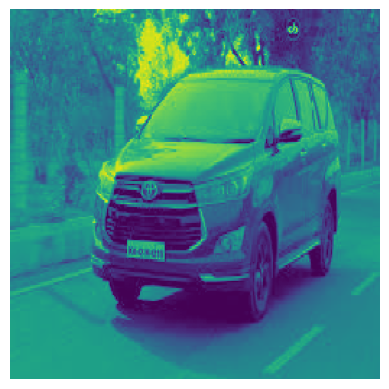

[0. 0. 0. 0. 0. 0. 1.]


In [10]:
display_image(X_train, y_train, 5)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(y_train)
print(X_train)

(3352, 256, 256, 1)
(3352, 7)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[[[0.05058824]
   [0.05450942]
   [0.05450942]
   ...
   [0.17175767]
   [0.16783649]
   [0.16783649]]

  [[0.05058824]
   [0.05450942]
   [0.05450942]
   ...
   [0.17175767]
   [0.16783649]
   [0.16783649]]

  [[0.05450942]
   [0.05450942]
   [0.05843059]
   ...
   [0.17680864]
   [0.17567885]
   [0.17680864]]

  ...

  [[0.41599375]
   [0.46304786]
   [0.51705027]
   ...
   [0.1805608 ]
   [0.18262707]
   [0.18654825]]

  [[0.4983385 ]
   [0.49441728]
   [0.48175967]
   ...
   [0.1805608 ]
   [0.18262707]
   [0.18654825]]

  [[0.4983385 ]
   [0.49441728]
   [0.48175967]
   ...
   [0.1805608 ]
   [0.18262707]
   [0.18654825]]]


 [[[0.9489248 ]
   [0.9489248 ]
   [0.9489248 ]
   ...
   [0.9489248 ]
   [0.9489248 ]
   [0.9489248 ]]

  [[0.9489248 ]
   [0.9489248 ]
   [0.9489248 ]
   ...
   [0.9489248 ]

In [12]:
# prompt: create a tensorflow model to train the images in X_train and output labels y_train

import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(y_train.shape[1], activation='softmax') # Output layer with softmax
])

# Compile the model
model.compile(optimizer='adam',
              loss="categorical_crossentropy",  # Use categorical_crossentropy for multi-class
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20) # Adjust epochs as needed

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.2636 - loss: 1.9201
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5718 - loss: 1.2480
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8267 - loss: 0.5521
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9564 - loss: 0.1658
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9892 - loss: 0.0497
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9961 - loss: 0.0171
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 1.0000 - loss: 6.0052e-04
Epoch 9/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 1.0000 - loss: 2.7775e-04
Epoch 10/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 1.0000 - loss: 1.9926e-04
Epoch 11/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 1.0000 - loss: 1.4709e-04
Epoch 12/20
105/1

In [13]:
# Evaluate the model (optional)
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6588 - loss: 2.9699
Test accuracy: 0.6494464874267578


In [15]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [17]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.2573081851005554
